로버트 크로스 에지 검출기

1. 영상불러오기

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# 엣지: 영상의의 두드러진진 경계영역역, 모양, 크기등 많은 정보를담고있다.
# 밝기차이가 갑자기변하는 지점 인접 픽셀값차이 이용해서 미분연산산
# 기울기;(gradient)가 급한영역이기 때문에  기울기크기 값이 큰곳을 에지로검출
# 직접적으로 계산하기 보다 미분역할을 하는 커널(필터)를 정의하여 컨볼루션연산

#로버트 크로스 에지 검출기
#45도 방향의 대각선 에지를 찾는데 유용
#x축 미분하는 gx y축 미분하는 gy에 컨볼루션연산 적용
#잡음에 민감
drive.mount('/content/gdrive') 
#영상 불러오기
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

# color영상을 gray영상으로 만들기
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


로버트 크로스 필터

In [ ]:
# 로버트 크로스 필터
gx = np.array([[-1, 0], [0, 1]], dtype =int)
gy = np.array([[0, -1], [1, 0]], dtype =int)

로버트 크로스 컨벌류션

In [ ]:
# 로버트 크로스 컨벌루션
x1 = cv2.filter2D(gray_img1, -1, gx)
# filter src(입력영상), depth(출력영상의 깊이 -1은 src와 같은 타입의 dst(출력)영상 생상), 커널(필터)행렬
y1 = cv2.filter2D(gray_img1, -1, gy)
# x축 y축 따로 적용
# 미리 설정된 커널과 이미지를 컨볼루션 연산하고
x2 = cv2.filter2D(gray_img2, -1, gx)
y2 = cv2.filter2D(gray_img2, -1, gy)


절대값 취하기

In [ ]:
# 절대값 취하기
absX1 = cv2.convertScaleAbs(x1)
absY1 = cv2.convertScaleAbs(y1)
# 절대값을 취하고 가중치를 곱해준다.
output_img1 = cv2.addWeighted(absX1, 0.5, absY1, 0.5, 0)

absX2 = cv2.convertScaleAbs(x2)
absY2 = cv2.convertScaleAbs(y2)

output_img2 = cv2.addWeighted(absX2, 0.5, absY2, 0.5, 0)


그림출력

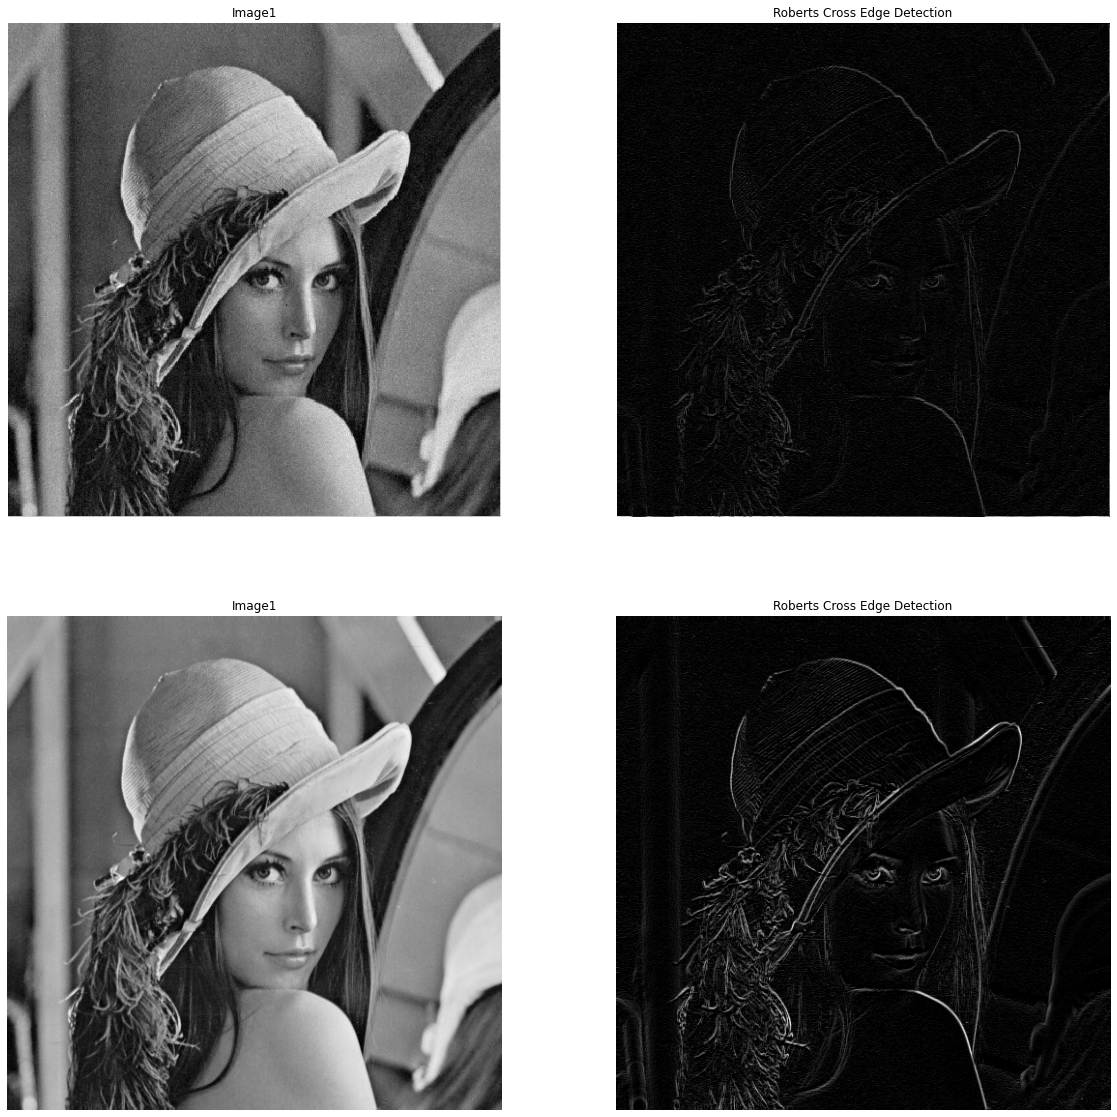

In [ ]:
#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(2,2,1)
# 1  2
# 3  4
# 2 * 2
plt.title("Image1") # 가우시안 잡음이 있는 이미지
plt.imshow(gray_img1, cmap='gray')
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Roberts Cross Edge Detection")
plt.imshow(output_img1, cmap='gray')
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Image1")
plt.imshow(gray_img2, cmap='gray')
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Roberts Cross Edge Detection")
plt.imshow(output_img2, cmap='gray')
plt.axis("off")
plt.show()